In [44]:
# imports
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM,Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import SpatialDropout1D,Dropout,Bidirectional,Conv1D,GlobalMaxPooling1D,MaxPooling1D,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping


%matplotlib inline

In [2]:
train = pd.read_csv('train.tsv',sep = '\t')
test = pd.read_csv('test.tsv',sep = '\t')

In [3]:
train.head

<bound method NDFrame.head of         PhraseId  SentenceId  \
0              1           1   
1              2           1   
2              3           1   
3              4           1   
4              5           1   
5              6           1   
6              7           1   
7              8           1   
8              9           1   
9             10           1   
10            11           1   
11            12           1   
12            13           1   
13            14           1   
14            15           1   
15            16           1   
16            17           1   
17            18           1   
18            19           1   
19            20           1   
20            21           1   
21            22           1   
22            23           1   
23            24           1   
24            25           1   
25            26           1   
26            27           1   
27            28           1   
28            29           1   
29        

In [4]:
test.head

<bound method NDFrame.head of        PhraseId  SentenceId                                             Phrase
0        156061        8545  An intermittently pleasing but mostly routine ...
1        156062        8545  An intermittently pleasing but mostly routine ...
2        156063        8545                                                 An
3        156064        8545  intermittently pleasing but mostly routine effort
4        156065        8545         intermittently pleasing but mostly routine
5        156066        8545                        intermittently pleasing but
6        156067        8545                            intermittently pleasing
7        156068        8545                                     intermittently
8        156069        8545                                           pleasing
9        156070        8545                                                but
10       156071        8545                                     mostly routine
11       156072       

In [5]:
class_count = train['Sentiment'].value_counts()
class_count

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Number of reviews ')

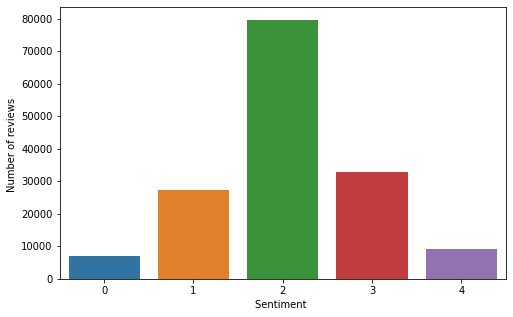

In [6]:
x = np.array(class_count.index)
y = np.array(class_count.values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('Sentiment ')
plt.ylabel('Number of reviews ')

In [8]:
print('#sentences in train:',len(train['SentenceId'].unique()))
print('#sentences in test:',len(test['SentenceId'].unique()))
print('mean words/sentence in train:',train.groupby('SentenceId')['Phrase'].count().mean())
print('mean words/sentence in test:',test.groupby('SentenceId')['Phrase'].count().mean())

#sentences in train: 8529
#sentences in test: 3310
mean words/sentence in train: 18.297572986282095
mean words/sentence in test: 20.027794561933536


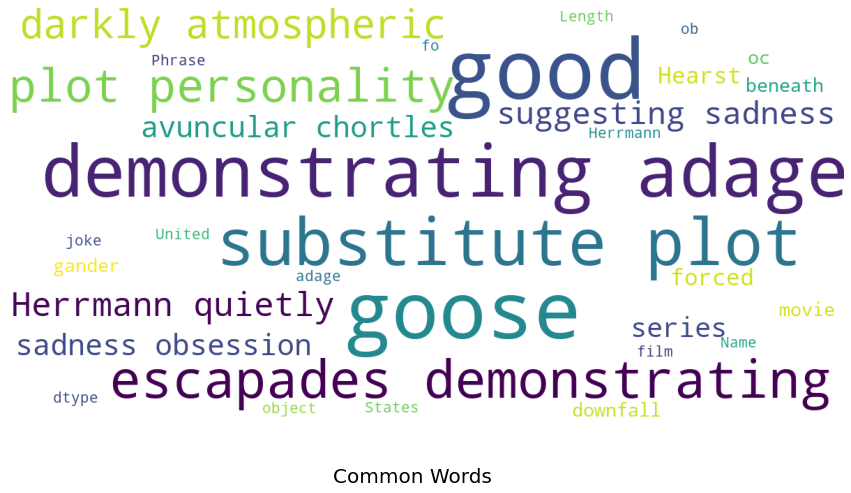

In [16]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40, scale=3,random_state=1).generate(str(train['Phrase']))

fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
fig.suptitle('Common Words', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud)
plt.show()

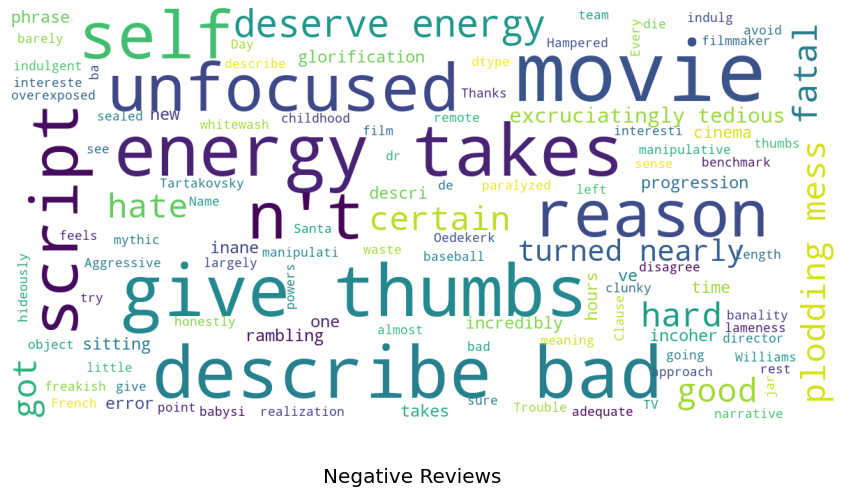

In [17]:
wordcloud_2 = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40, scale=3,random_state=1).generate(str(train[train['Sentiment'] == 0]['Phrase']))

fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
fig.suptitle('Negative Reviews', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud_2)
plt.show()

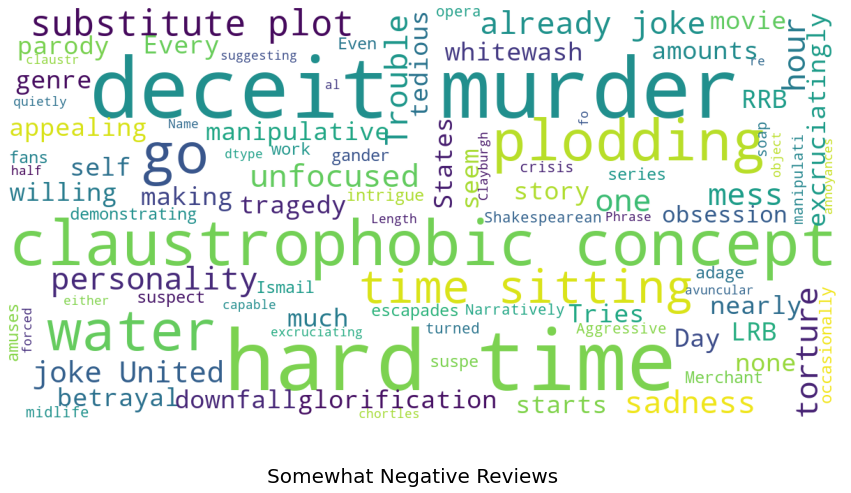

In [18]:
wordcloud_3 = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40, scale=3,random_state=1).generate(str(train[train['Sentiment'] == 1]['Phrase']))

fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
fig.suptitle('Somewhat Negative Reviews', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud_3)
plt.show()

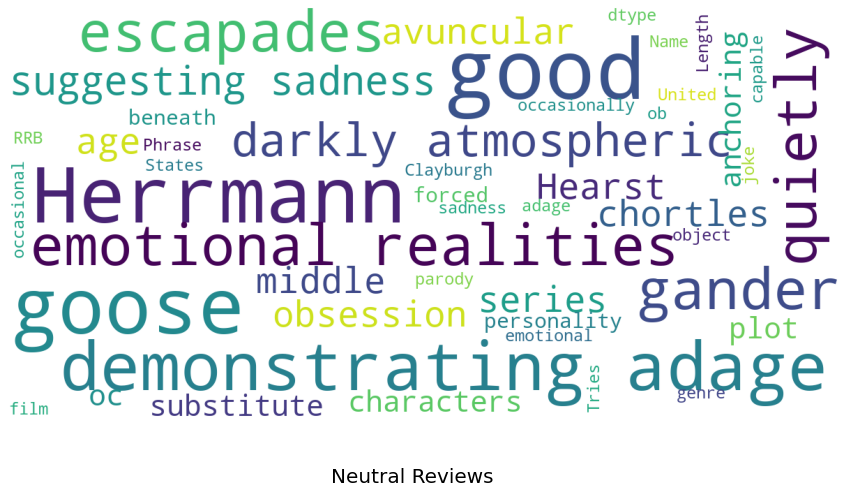

In [19]:
wordcloud_4 = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40, scale=3,random_state=1).generate(str(train[train['Sentiment'] == 2]['Phrase']))

fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
fig.suptitle('Neutral Reviews', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud_4)
plt.show()

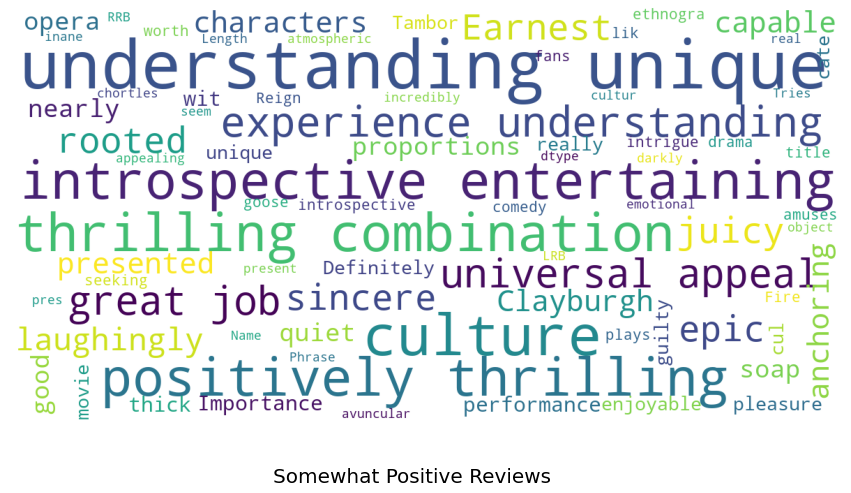

In [20]:
wordcloud_5 = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40, scale=3,random_state=1).generate(str(train[train['Sentiment'] == 3]['Phrase']))

fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
fig.suptitle('Somewhat Positive Reviews', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud_5)
plt.show()

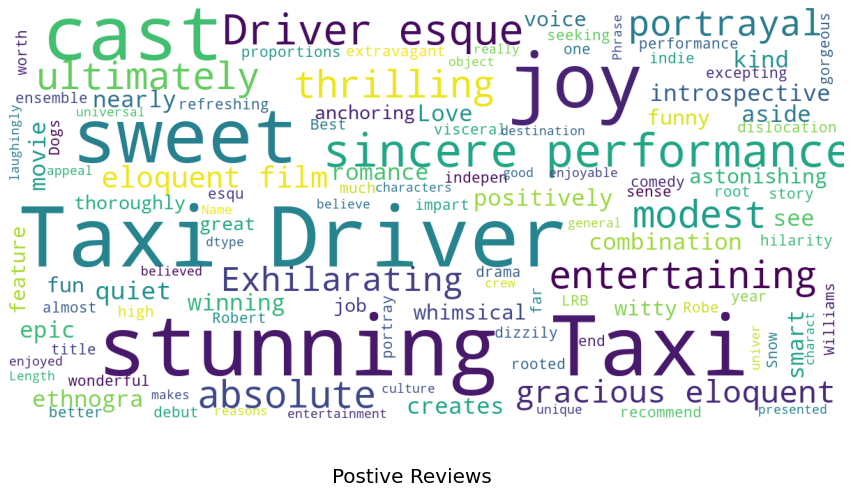

In [21]:
wordcloud_6 = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40, scale=3,random_state=1).generate(str(train[train['Sentiment'] == 4]['Phrase']))

fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
fig.suptitle('Postive Reviews', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud_6)
plt.show()

In [24]:
tokenizer = TweetTokenizer()

In [25]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = list(train['Phrase'].values) + list(test['Phrase'].values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(train['Phrase'])
test_vectorized = vectorizer.transform(test['Phrase'])

/Users/paulmathai/.virtualenvs/keras_tf/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [26]:
y = train['Sentiment']

In [28]:
x_train , x_val, y_train , y_val = train_test_split(train_vectorized,y,test_size = 0.2)

In [30]:
lr = LogisticRegression()
ovr = OneVsRestClassifier(lr)
ovr.fit(x_train,y_train)
print(classification_report( ovr.predict(x_val) , y_val))
print(accuracy_score( ovr.predict(x_val) , y_val ))

/Users/paulmathai/.virtualenvs/keras_tf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/paulmathai/.virtualenvs/keras_tf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

              precision    recall  f1-score   support

           0       0.19      0.64      0.29       410
           1       0.34      0.56      0.42      3257
           2       0.91      0.65      0.76     22307
           3       0.43      0.60      0.50      4662
           4       0.21      0.66      0.31       576

    accuracy                           0.64     31212
   macro avg       0.41      0.62      0.46     31212
weighted avg       0.76      0.64      0.67     31212

0.6360694604639241


In [31]:
svm = LinearSVC()
svm.fit(x_train,y_train)
print(classification_report( svm.predict(x_val) , y_val))
print(accuracy_score( svm.predict(x_val) , y_val ))

              precision    recall  f1-score   support

           0       0.38      0.48      0.42      1095
           1       0.50      0.55      0.52      4852
           2       0.82      0.73      0.77     17989
           3       0.52      0.58      0.55      5902
           4       0.41      0.55      0.47      1374

    accuracy                           0.66     31212
   macro avg       0.52      0.58      0.55     31212
weighted avg       0.68      0.66      0.66     31212

0.6550685633730616


In [32]:
estimators = [ ('svm',svm) , ('ovr' , ovr) ]
clf = VotingClassifier(estimators , voting='hard')
clf.fit(x_train,y_train)
print(classification_report( clf.predict(x_val) , y_val))
print(accuracy_score( clf.predict(x_val) , y_val ))

/Users/paulmathai/.virtualenvs/keras_tf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/paulmathai/.virtualenvs/keras_tf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

              precision    recall  f1-score   support

           0       0.38      0.48      0.43      1112
           1       0.51      0.55      0.52      5010
           2       0.86      0.69      0.77     20097
           3       0.42      0.61      0.50      4438
           4       0.20      0.67      0.31       555

    accuracy                           0.65     31212
   macro avg       0.47      0.60      0.50     31212
weighted avg       0.71      0.65      0.67     31212

0.6471549404075355


In [36]:
target=train.Sentiment.values
y=to_categorical(target)

In [37]:
max_features = 13000
max_words = 50
batch_size = 128
epochs = 3
num_classes=5

In [38]:
X_train , X_val , Y_train , Y_val = train_test_split(train['Phrase'],y,test_size = 0.20)

In [40]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [41]:
X_test = tokenizer.texts_to_sequences(test['Phrase'])
X_test =pad_sequences(X_test, maxlen=max_words)

In [42]:
X_train =pad_sequences(X_train, maxlen=max_words)
X_val = pad_sequences(X_val, maxlen=max_words)
X_test =pad_sequences(X_test, maxlen=max_words)

In [45]:
model_GRU=Sequential()
model_GRU.add(Embedding(max_features,100,mask_zero=True))
model_GRU.add(GRU(64,dropout=0.4,return_sequences=True))
model_GRU.add(GRU(32,dropout=0.5,return_sequences=False))
model_GRU.add(Dense(num_classes,activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy',optimizer=Adam(lr = 0.001),metrics=['accuracy'])
model_GRU.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1300000   
_________________________________________________________________
gru (GRU)                    (None, None, 64)          31872     
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                9408      
_________________________________________________________________
dense (Dense)                (None, 5)                 165       
Total params: 1,341,445
Trainable params: 1,341,445
Non-trainable params: 0
_________________________________________________________________


In [46]:
%%time
history1=model_GRU.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Train on 124848 samples, validate on 31212 samples
Epoch 1/3
124848/124848 [==============================] - 98s 781us/sample - loss: 1.0274 - accuracy: 0.5940 - val_loss: 0.8686 - val_accuracy: 0.6511
Epoch 2/3
124848/124848 [==============================] - 97s 778us/sample - loss: 0.8260 - accuracy: 0.6663 - val_loss: 0.8296 - val_accuracy: 0.6660
Epoch 3/3
124848/124848 [==============================] - 110s 882us/sample - loss: 0.7663 - accuracy: 0.6889 - val_loss: 0.8206 - val_accuracy: 0.6703
CPU times: user 15min 41s, sys: 9min 23s, total: 25min 4s
Wall time: 5min 4s


In [51]:
y_pred1=model_GRU.predict_classes(X_test)
y_pred1

array([3, 3, 2, ..., 2, 2, 2])

In [52]:
model2_GRU=Sequential()
model2_GRU.add(Embedding(max_features,100,mask_zero=True))
model2_GRU.add(GRU(64,dropout=0.4,return_sequences=True))
model2_GRU.add(GRU(32,dropout=0.5,return_sequences=False))
model2_GRU.add(Dense(num_classes,activation='sigmoid'))
model2_GRU.compile(loss='binary_crossentropy',optimizer=Adam(lr = 0.001),metrics=['accuracy'])
model2_GRU.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1300000   
_________________________________________________________________
gru_2 (GRU)                  (None, None, 64)          31872     
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                9408      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 1,341,445
Trainable params: 1,341,445
Non-trainable params: 0
_________________________________________________________________


In [53]:
%%time
history2=model2_GRU.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Train on 124848 samples, validate on 31212 samples
Epoch 1/3
124848/124848 [==============================] - 96s 765us/sample - loss: 0.3625 - accuracy: 0.8448 - val_loss: 0.3097 - val_accuracy: 0.8614
Epoch 2/3
124848/124848 [==============================] - 101s 809us/sample - loss: 0.2947 - accuracy: 0.8678 - val_loss: 0.2980 - val_accuracy: 0.8680
Epoch 3/3
124848/124848 [==============================] - 100s 802us/sample - loss: 0.2780 - accuracy: 0.8762 - val_loss: 0.2938 - val_accuracy: 0.8692
CPU times: user 15min 39s, sys: 8min 58s, total: 24min 38s
Wall time: 4min 56s


In [54]:
y_pred2=model2_GRU.predict_classes(X_test)
y_pred2

array([3, 3, 2, ..., 2, 2, 1])

In [55]:
model3_LSTM=Sequential()
model3_LSTM.add(Embedding(max_features,100,mask_zero=True))
model3_LSTM.add(LSTM(64,dropout=0.4,return_sequences=True))
model3_LSTM.add(LSTM(32,dropout=0.5,return_sequences=False))
model3_LSTM.add(Dense(num_classes,activation='sigmoid'))
model3_LSTM.compile(loss='binary_crossentropy',optimizer=Adam(lr = 0.001),metrics=['accuracy'])
model3_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         1300000   
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          42240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 1,354,821
Trainable params: 1,354,821
Non-trainable params: 0
_________________________________________________________________


In [56]:
%%time
history3=model3_LSTM.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Train on 124848 samples, validate on 31212 samples
Epoch 1/3
124848/124848 [==============================] - 131s 1ms/sample - loss: 0.4073 - accuracy: 0.8374 - val_loss: 0.3607 - val_accuracy: 0.8509
Epoch 2/3
124848/124848 [==============================] - 120s 964us/sample - loss: 0.3338 - accuracy: 0.8558 - val_loss: 0.3131 - val_accuracy: 0.8592
Epoch 3/3
124848/124848 [==============================] - 115s 919us/sample - loss: 0.2918 - accuracy: 0.8685 - val_loss: 0.3009 - val_accuracy: 0.8646
CPU times: user 18min 57s, sys: 12min 27s, total: 31min 24s
Wall time: 6min 5s


In [57]:
y_pred3=model3_LSTM.predict_classes(X_test)
y_pred3

array([2, 2, 2, ..., 2, 2, 1])

In [58]:
model4_BGRU = Sequential()
model4_BGRU.add(Embedding(max_features, 100, input_length=max_words))
model4_BGRU.add(SpatialDropout1D(0.25))
model4_BGRU.add(Bidirectional(GRU(64,dropout=0.4,return_sequences = True)))
model4_BGRU.add(Bidirectional(GRU(32,dropout=0.5,return_sequences = False)))
model4_BGRU.add(Dense(5, activation='sigmoid'))
model4_BGRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4_BGRU.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 100)           1300000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 128)           63744     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                31104     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 1,395,173
Trainable params: 1,395,173
Non-trainable params: 0
_________________________________________________________________


In [59]:
%%time
history4=model4_BGRU.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Train on 124848 samples, validate on 31212 samples
Epoch 1/3
124848/124848 [==============================] - 174s 1ms/sample - loss: 0.3483 - accuracy: 0.8474 - val_loss: 0.3026 - val_accuracy: 0.8605
Epoch 2/3
124848/124848 [==============================] - 173s 1ms/sample - loss: 0.2902 - accuracy: 0.8688 - val_loss: 0.2907 - val_accuracy: 0.8682
Epoch 3/3
124848/124848 [==============================] - 176s 1ms/sample - loss: 0.2749 - accuracy: 0.8761 - val_loss: 0.2880 - val_accuracy: 0.8686
CPU times: user 36min 27s, sys: 27min 20s, total: 1h 3min 48s
Wall time: 8min 42s


In [60]:
y_pred4=model4_BGRU.predict_classes(X_test)
y_pred4

array([2, 2, 2, ..., 1, 1, 1])

In [61]:
model5_CNN= Sequential()
model5_CNN.add(Embedding(max_features,100,input_length=max_words))
model5_CNN.add(Dropout(0.2))
model5_CNN.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
model5_CNN.add(GlobalMaxPooling1D())
model5_CNN.add(Dense(128,activation='relu'))
model5_CNN.add(Dropout(0.2))
model5_CNN.add(Dense(num_classes,activation='sigmoid'))
model5_CNN.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model5_CNN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 100)           1300000   
_________________________________________________________________
dropout (Dropout)            (None, 50, 100)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 64)            19264     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [62]:
%%time
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)

history5=model5_CNN.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=3, batch_size=batch_size, verbose=1,callbacks = [early_stop])

Train on 124848 samples, validate on 31212 samples
Epoch 1/3
124848/124848 [==============================] - 30s 242us/sample - loss: 0.3472 - accuracy: 0.8467 - val_loss: 0.3032 - val_accuracy: 0.8629
Epoch 2/3
124848/124848 [==============================] - 29s 232us/sample - loss: 0.2825 - accuracy: 0.8718 - val_loss: 0.2903 - val_accuracy: 0.8682
Epoch 3/3
124848/124848 [==============================] - 40s 317us/sample - loss: 0.2580 - accuracy: 0.8839 - val_loss: 0.2882 - val_accuracy: 0.8708
CPU times: user 5min 23s, sys: 3min 31s, total: 8min 55s
Wall time: 1min 38s


In [63]:
y_pred5=model5_CNN.predict_classes(X_test)
y_pred5

array([2, 2, 2, ..., 2, 2, 2])

In [64]:
model6_CnnGRU= Sequential()
model6_CnnGRU.add(Embedding(max_features,100,input_length=max_words))
model6_CnnGRU.add(Conv1D(64,kernel_size=3,padding='same',activation='relu'))
model6_CnnGRU.add(MaxPooling1D(pool_size=2))
model6_CnnGRU.add(Dropout(0.25))
model6_CnnGRU.add(GRU(128,return_sequences=True))
model6_CnnGRU.add(Dropout(0.3))
model6_CnnGRU.add(Flatten())
model6_CnnGRU.add(Dense(128,activation='relu'))
model6_CnnGRU.add(Dropout(0.5))
model6_CnnGRU.add(Dense(5,activation='sigmoid'))
model6_CnnGRU.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model6_CnnGRU.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 100)           1300000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 64)            19264     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 64)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 64)            0         
_________________________________________________________________
gru_6 (GRU)                  (None, 25, 128)           74496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)             

In [65]:
%%time
history6=model6_CnnGRU.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=3, batch_size=batch_size, verbose=1,callbacks=[early_stop])

Train on 124848 samples, validate on 31212 samples
Epoch 1/3
124848/124848 [==============================] - 112s 895us/sample - loss: 0.3535 - accuracy: 0.8465 - val_loss: 0.3028 - val_accuracy: 0.8591
Epoch 2/3
124848/124848 [==============================] - 106s 849us/sample - loss: 0.2911 - accuracy: 0.8686 - val_loss: 0.2881 - val_accuracy: 0.8679
Epoch 3/3
124848/124848 [==============================] - 107s 859us/sample - loss: 0.2676 - accuracy: 0.8785 - val_loss: 0.2862 - val_accuracy: 0.8694
CPU times: user 15min 17s, sys: 15min 5s, total: 30min 23s
Wall time: 5min 25s


In [66]:
y_pred6=model6_CnnGRU.predict_classes(X_test)
y_pred6

array([2, 2, 2, ..., 2, 2, 1])

In [67]:
model7_GruCNN = Sequential()
model7_GruCNN.add(Embedding(max_features,100,input_length=max_words))
model7_GruCNN.add(Dropout(0.2))
model7_GruCNN.add(Bidirectional(GRU(units=128 , return_sequences=True)))
model7_GruCNN.add(Conv1D(32 , kernel_size=3 , padding='same' , activation='relu'))
model7_GruCNN.add(GlobalMaxPooling1D())
model7_GruCNN.add(Dense(units = 64 , activation='relu'))
model7_GruCNN.add(Dropout(0.5))
model7_GruCNN.add(Dense(units=5,activation='sigmoid'))
model7_GruCNN.compile(loss='binary_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model7_GruCNN.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 50, 100)           1300000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 256)           176640    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 32)            24608     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)               

In [68]:
%%time
history7 = model7_GruCNN.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=4, batch_size=batch_size, verbose=1,callbacks=[early_stop])

Train on 124848 samples, validate on 31212 samples
Epoch 1/4
124848/124848 [==============================] - 317s 3ms/sample - loss: 0.3747 - accuracy: 0.8375 - val_loss: 0.3072 - val_accuracy: 0.8576
Epoch 2/4
124848/124848 [==============================] - 303s 2ms/sample - loss: 0.2973 - accuracy: 0.8666 - val_loss: 0.2905 - val_accuracy: 0.8669
Epoch 3/4
124848/124848 [==============================] - 292s 2ms/sample - loss: 0.2736 - accuracy: 0.8771 - val_loss: 0.2871 - val_accuracy: 0.8697
Epoch 4/4
124848/124848 [==============================] - 340s 3ms/sample - loss: 0.2586 - accuracy: 0.8840 - val_loss: 0.2881 - val_accuracy: 0.8701
CPU times: user 1h 5min 51s, sys: 1h 9min 20s, total: 2h 15min 11s
Wall time: 20min 52s


In [69]:
y_pred7=model7_GruCNN.predict_classes(X_test)
y_pred7

array([3, 3, 2, ..., 2, 2, 1])

In [70]:
com_all=pd.DataFrame({'model1':y_pred1,'model2':y_pred2,'model3':y_pred3,'model4':y_pred4,'model5':y_pred5,'model6':y_pred6,'model7':y_pred7})
pred_mode=com_all.agg('mode',axis=1)[0].values
com_all.head()

,model1,model2,model3,model4,model5,model6,model7
0,3,3,2,2,2,2,3
1,3,3,2,2,2,2,3
2,2,2,2,2,2,2,2
3,3,3,2,2,2,2,3
4,2,2,2,2,2,3,2
